In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np
from numba import jit

## Définition d'un réseau de neurones

In [2]:
# Numba RNN model
@jit(nopython=True)
def sigmoid(x):
    return 1/(1+np.exp(-x))

@jit(nopython=True)
def array_to_vec(x):
    y = x.flatten()
    N = y.shape[0]
    out = np.zeros((N,1))
    for i in range(0,N,1):
        out[i,0] = y[i]
    return out

@jit(nopython=True)
def RNN_integrate(initial_state, A, t0, tf, delta_t):
    N = initial_state.shape[0] # system's dimension
    times = np.arange(t0, tf+delta_t, delta_t) 
    T = times.shape[0] # number of time steps
    states = np.zeros((N,T))
    x0 = initial_state.flatten()
    states[:,0] = x0
    for step in range(T-1):
        x = array_to_vec(states[:,step])
        vector_field = -x + 1.0 * A @ np.tanh(x)
        new_state = x + delta_t * vector_field
        states[:,step+1] = new_state.flatten()
    return times, states

## Données à utiliser

Chaque neurone sera représenté comme un pixel dans une image (une matrice) et la valeur du pixel représente le niveau d'activité du neurone. Une image particulière est donc équivalente à l'état d'un réseau de neurones.

/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


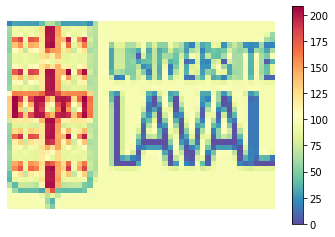

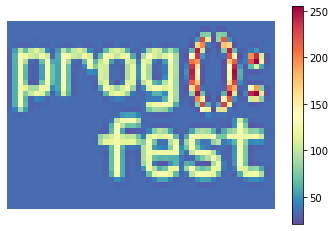

In [3]:
from PIL import Image
import os

n0 = 35 # Nb of pixels in y (nb of rows)
n1 = 50 # Nb of pixels in x (nb of columns)

cwd = os.getcwd()

# UL logo
image = Image.open(cwd + '/figures/ulaval.png')
image = image.convert('L')
image = image.resize((n1,n0))
ul = np.asarray(image)
ul = ul.astype('double')

plt.imshow(ul, cmap='Spectral_r')
plt.axis('off')
plt.colorbar()
plt.show()

# ProgFest logo
image = Image.open(cwd + '/figures/progfest.png')
image = image.convert('L')
image = image.resize((n1,n0))
pf = np.asarray(image)
pf = pf.astype('double')

plt.imshow(pf, cmap='Spectral_r')
plt.axis('off')
plt.colorbar()
plt.show()

## Réseau de neurones convergent

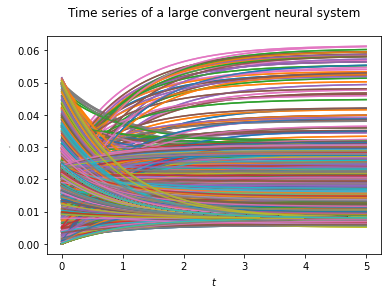

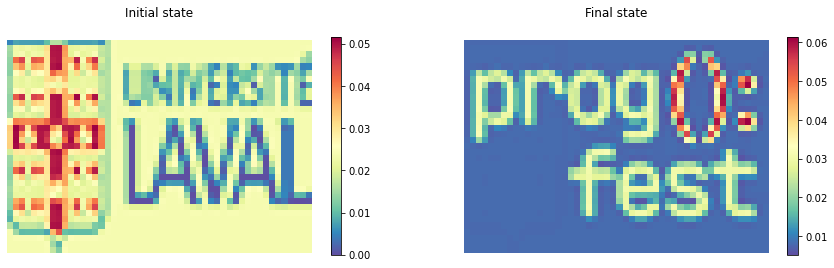

In [4]:
n = n0*n1                     # Number of neurons = number of pixels

p = pf.flatten().reshape(n,1) # ProgFest image as a vector
p = p/np.linalg.norm(p)       # Normalization
u = ul.flatten().reshape(n,1) # UL image as a vector
u = u/np.linalg.norm(u)       # Normalization

x_0 = u                       # Initial state as UL logo 
sigma = 1                     # sigma is the strength of interaction between neurons
A = sigma*(p @ p.T)           # Forcing the connectivity matrix to remember FrogFest logo
dt = 0.001

t,x = RNN_integrate(x_0, A, 0, 5, dt)

fig, ax = plt.subplots()
ax.plot(t,x.T)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=1)
ax.plot(t,x.T, alpha = 0.8)
ax.set_title('Time series of a large convergent neural system', fontsize=12, pad=20)
plt.show()

T = len(t)
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

fig, ax = plt.subplots(1,2,figsize=(15,5))
im0 = ax[0].matshow(X[:,:,0], cmap='Spectral_r')
ax[0].axis('off')
ax[0].set_title('Initial state', fontsize=12)
cbar = fig.colorbar(im0, ax=ax[0], shrink=0.8)

im1 = ax[1].matshow(X[:,:,-1], cmap='Spectral_r')
ax[1].axis('off')
ax[1].set_title('Final state', fontsize=12)
cbar = fig.colorbar(im1, ax=ax[1], shrink=0.8)
plt.show()

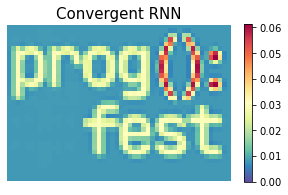

In [5]:
# Animation data
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

# Initialization
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
im = ax.imshow(X[:,:,0], cmap='Spectral_r', vmin = Xmin, vmax=Xmax)
cbar = fig.colorbar(im, ax=ax, shrink=0.58)
plt.title('Convergent RNN', fontsize=15)

# Update function
def animate(i):
    im.set_array(X[:,:,i])
    return [im]

# Animation
anim = animation.FuncAnimation(fig, animate, repeat=True, frames=range(1,T,100))

rc('animation', html='html5')
anim.save('figures/ul_progfest_RNN.gif', fps=10, dpi=300)
anim

## Réseau de neurones chaotique

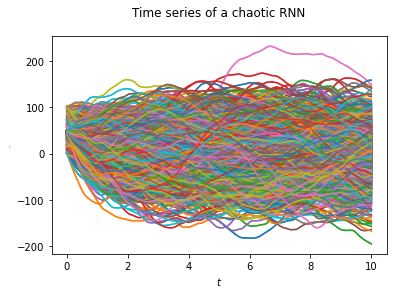

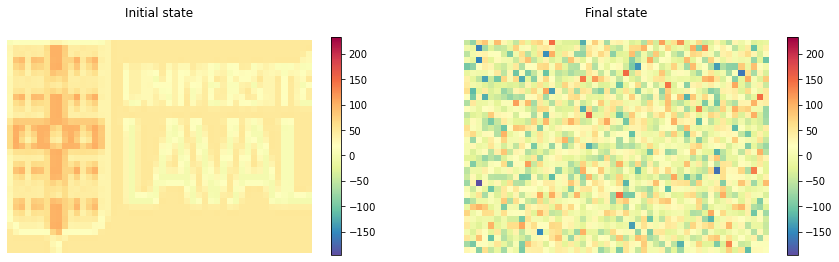

In [6]:
x_0 = 2000*u                             # Initial state as UL logo
sigma = 60                               # Strength of interaction between the neurons
A = sigma/np.sqrt(n)*np.random.randn(n,n)# Random connectivity matrix

dt = 0.001

t,x = RNN_integrate(x_0, A, 0, 10, dt)

fig, ax = plt.subplots()
ax.plot(t,x.T)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=1)
ax.plot(t,x.T, alpha = 0.8)
ax.set_title('Time series of a chaotic RNN', fontsize=12, pad=20)
plt.show()

T = len(t)
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

fig, ax = plt.subplots(1,2,figsize=(15,5))
im0 = ax[0].matshow(X[:,:,0], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[0].axis('off')
ax[0].set_title('Initial state', fontsize=12)
cbar = fig.colorbar(im0, ax=ax[0], shrink=0.8)

im1 = ax[1].matshow(X[:,:,-1], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[1].axis('off')
ax[1].set_title('Final state', fontsize=12)
cbar = fig.colorbar(im1, ax=ax[1], shrink=0.8)
plt.show()

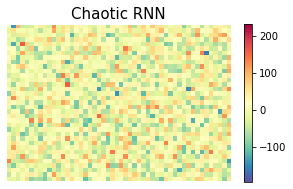

In [7]:
# Animation data
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

# Initialization
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
im = ax.imshow(X[:,:,0], cmap='Spectral_r', vmin = Xmin, vmax=Xmax)
cbar = fig.colorbar(im, ax=ax, shrink=0.58)
plt.title('Chaotic RNN', fontsize=15)

# Update function
def animate(i):
    im.set_array(X[:,:,i])
    return [im]

# Animation
anim = animation.FuncAnimation(fig, animate, repeat=True, frames=range(1,T-5000,20))

rc('animation', html='html5')
anim.save('figures/progfest_chaotic_RNN.gif', fps=10, dpi=300)
anim

## Mesures du chaos

In [8]:
import nolds
import EntropyHub as eh

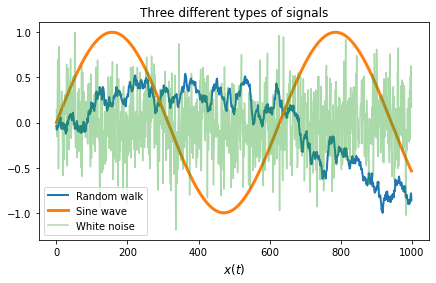

In [9]:
# Random walk
rwalk = np.cumsum(np.random.randn(1000))
rwalk /= (np.abs(rwalk).max())
# Sine wave
sine = np.sin(10*np.arange(1000)/1000)
# White noise
noise = np.random.randn(1000)
noise /= noise.max()

plt.figure(figsize=(7,4))
plt.plot(rwalk, linewidth=2)
plt.plot(sine, linewidth=3)
plt.plot(noise, alpha=0.4)
plt.xlabel('$t$', fontsize=12)
plt.xlabel('$x(t)$', fontsize=12)
plt.title('Three different types of signals', fontsize=12)
plt.legend(['Random walk', 'Sine wave', 'White noise'])
plt.show()

In [10]:
# Lyapunov analysis

# Rosenstein 1993 method for estimating the Lyapunov exponent
# Large positive values are indicative of chaos
print(nolds.lyap_r(rwalk).max(),
      nolds.lyap_r(sine).max(),
      nolds.lyap_r(noise).max())

# Eckmann 1986 method for estimating the Lyapunov exponent
# Large positive values are indicative of chaos
print(nolds.lyap_e(rwalk).max(),
      nolds.lyap_e(sine).max(),
      nolds.lyap_e(noise).max())

/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 52
  warnings.warn(msg.format(lag), RuntimeWarning)
/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 52
  warnings.warn(msg.format(lag), RuntimeWarning)
/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting 

0.010004925158093944 -0.0003291287816556391 -0.001107873880501949
0.0966048 0.001020159 0.056120206


In [11]:
# Entropy analysis

# Approximate entropy proposed by Pincus et al. in 1991:
# small values are indicative of regularity while high values are related to noise or chaos
print(eh.ApEn(rwalk)[0][-1],
      eh.ApEn(sine)[0][-1],
      eh.ApEn(noise)[0][-1])

# Sample entropy as defined by Richman & Moorman in 2000:
# small values are indicative of regularity while high values are related to noise or chaos
print(eh.SampEn(rwalk)[0][-1],
      eh.SampEn(sine)[0][-1],
      eh.SampEn(noise)[0][-1])

0.2616218629307583 0.026479846751492175 1.6497141186817208
0.24784484675898294 0.023623260312219695 2.1449368677793657


[[ 1.         -0.57324957 -0.2699435   0.16958697 -0.03347687 -0.02307538]
 [-0.57324957  1.         -0.00531502 -0.09508803  0.01199698  0.01265756]
 [-0.2699435  -0.00531502  1.          0.18191707  0.03436292  0.02328206]
 [ 0.16958697 -0.09508803  0.18191707  1.         -0.03765911 -0.03270997]
 [-0.03347687  0.01199698  0.03436292 -0.03765911  1.         -0.05968346]
 [-0.02307538  0.01265756  0.02328206 -0.03270997 -0.05968346  1.        ]]


<ipython-input-12-87cd04bc7685>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['rwalk','|rwalk|', 'sine','|sine|','noise','|noise|'])
<ipython-input-12-87cd04bc7685>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['rwalk','|rwalk|', 'sine','|sine|','noise','|noise|'])


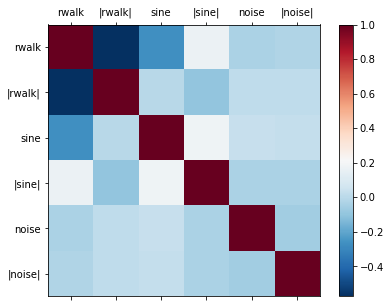

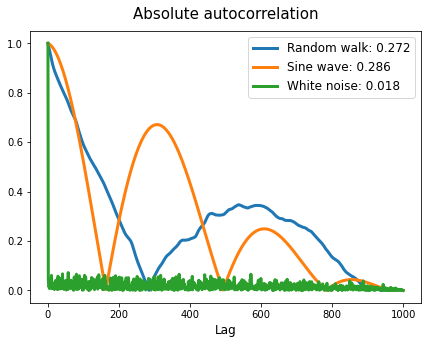

In [12]:
# Correlation analysis

# Matrix of Pearson's correlation coefficients between pairs of signals
# A small absolute value is indicative of independent signals
data = np.vstack((rwalk,np.abs(rwalk),
                  sine,np.abs(sine),
                  noise, 
                  np.abs(noise)))

print(np.corrcoef(data))

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
im = ax.matshow(np.corrcoef(data), cmap='RdBu_r')
cbar = fig.colorbar(im, ax=ax, shrink=1.0)
ax.set_xticklabels(['']+['rwalk','|rwalk|', 'sine','|sine|','noise','|noise|'])
ax.set_yticklabels(['']+['rwalk','|rwalk|', 'sine','|sine|','noise','|noise|'])
plt.show()

def autocorr(data):
    """
    Compute the auto-correlation coefficient of a 1d signal. 
    
    The function returns a 1d array whose t-th component is equal to the Pearson 
    correlation coefficient of the signal with the signal lagged by t time steps.  
    """
    # Mean
    mean = np.mean(data)
    # Variance
    var = np.var(data)
    # Normalized data
    ndata = data - mean
    # Autocorrelation
    acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
    acorr = acorr / var / len(ndata)
    return acorr


# Mean absolute autocorrelations
rwalk_avg_acorr = np.abs(autocorr(rwalk)).mean()
sine_avg_acorr = np.abs(autocorr(sine)).mean()
noise_avg_acorr = np.abs(autocorr(noise)).mean()

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot(np.abs(autocorr(rwalk)), linewidth=3)
ax.plot(np.abs(autocorr(sine)), linewidth=3)
ax.plot(np.abs(autocorr(noise)), linewidth=3)
ax.set_title('Absolute autocorrelation', fontsize = 15, pad = 12)
ax.legend(['Random walk: %1.3f' %rwalk_avg_acorr, 
            'Sine wave: %1.3f' %sine_avg_acorr, 
            'White noise: %1.3f' %noise_avg_acorr],
           fontsize = 12)
ax.set_xlabel('Lag', fontsize = 12)
plt.show()

## Retour sur les réseux de neurones chaotiques

In [13]:
x_0 = 2000*u                             # Initial state as UL logo
sigma = 60                               # Strength of interaction between the neurons
A = sigma/np.sqrt(n)*np.random.randn(n,n)# Random connectivity matrix
dt = 0.001
t,x = RNN_integrate(x_0, A, 0, 4, dt)

In [17]:
N=n
lyap = np.zeros((N,))
for i in range(N):
    lyap[i] = nolds.lyap_e(x[i,0::20]).max()

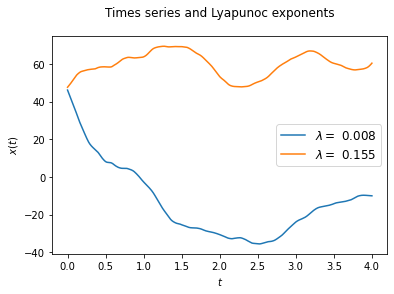

In [18]:
id_lyap_min = np.argmin(lyap)
id_lyap_max = np.argmax(lyap)

fig, ax = plt.subplots()
ax.plot(t, x[id_lyap_min,:])
ax.plot(t, x[id_lyap_max,:])
ax.set_title('Times series and Lyapunoc exponents', fontsize=12, pad=20)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=10)
ax.legend(['$\lambda=$ %1.3f' %lyap[id_lyap_min], 
            '$\lambda=$ %1.3f' %lyap[id_lyap_max]
            ], 
           fontsize = 12)
plt.show()

0.16957243735362867


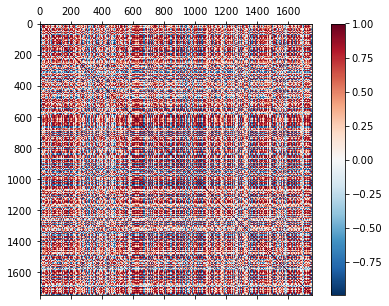

In [19]:
corr = np.corrcoef(x[1:N,:])
print(corr.mean())

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
im = ax.matshow(corr, cmap='RdBu_r')
cbar = fig.colorbar(im, ax=ax, shrink=1.0)
plt.show()

## Plus d'information

* scipy.integrate.solve_ivp
* https://github.com/NeuroTorch/NeuroTorch
* PHY-3500 Physique numérique
* PHY-2502 Dynamique non linéaire, chaos et complexité